### GRAMENER CASE STUDY

#### Problem Statement
- The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

<dl>
<dt>1.0 Understanding the Data</dt>
<dt>2.0 Data Cleaning</dt>
<dt>3.0 Data Analysis</dt>
<dd>   3.1 Univariate Analysis</dd>
<dd>   3.2 Bivariate Analysis </dd>
</dl>


In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### 1.0 Understanding the Data provided

#####     1.1 Read the CSV file provided by consumer finance company for analysis

In [5]:
loan_df = pd.read_csv('loan.csv')

#review the dataframe
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### 1.2 Understand Meta Data
- Total number of records in loan_df is 39717
- Total number of Columns in loan_df is 111

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
#check the columns in the loan dataframe
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
#check the shape of the loan dataframe
loan_df.shape

(39717, 111)

In [9]:
# describe the loan dataframe
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### 2.0 Data Cleaning

##### 2.1 Remove all the null's and NA column from the Dataframe
- Fetch all the column stats on null values
- Drop all the columns which has all the null or NA values ,as this will not help us in the analysis
- Drop the columns where majority of data is null say 90%
- Drop the columns which has no significance in the analysis 

In [10]:
#Fetch all the column stats on null values
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2458
emp_length                            0
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12939
purpose                               0
title                                10
zip_code                              0
addr_state                            0
dti                                   0


In [11]:
#Drop all the columns which has all the null or NA values ,as this will not help us in the analysis
loan_df.dropna(axis='columns',how='all',inplace=True)

In [12]:
#analyse the dataframe ,whether the column actually dropped or not
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2458
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12939
purpose                           0
title                            10
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [13]:
# 54 columns are dropped out of 111 
loan_df.shape

(39717, 57)

In [14]:
# find the percentage of nulls or NA in the columns 
round(loan_df.isnull().sum()/len(loan_df.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     0.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [15]:
#find the columns whose total percentage of null values is 90%
loan_df.columns[(loan_df.isnull().sum()/len(loan_df.index)) *100 > 90]

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [16]:
#drop the columns whose total percentage of null values is 90%
loan_df.drop(loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) > 90], axis=1,inplace=True)

In [17]:
#analyse the dataframe again 
 ## 2 more column is dropped 
loan_df.shape

(39717, 55)

In [18]:
#again check for whose
loan_df.columns[(loan_df.isnull().sum()/len(loan_df.index)) *100 > 0]

Index(['emp_title', 'desc', 'title', 'mths_since_last_delinq', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [19]:
# drop the columns which does not have any significance in the analsysis
  ## desc - Loan description provided by the borrower
  ## url  - URL for the LC page with listing data
loan_df.drop(['desc','url'], axis=1,inplace=True)

In [20]:
#analyse the dataframe again
loan_df.shape

(39717, 53)

In [21]:
#check the missing values in the rows 
  #as of now dont know ,whether the null columns is been used for the analysis or not ,so ignoring this TODO
loan_df[loan_df.isnull().sum(axis=1)>5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39659,121568,121574,4000,4000,1925.0,36 months,9.64%,128.41,B,B4,...,129.76,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39660,121535,121373,2800,2800,1625.0,36 months,8.70%,88.65,B,B1,...,89.80,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [22]:
#TODO DELETE THE ROWS 

In [23]:
#check the values in home_ownership column
  ## seems like OTHER and NONE will not provide any information ,hence it is better to remove them 
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [24]:
# remove columns with value 'OTHER', 'NONE' from the home_ownership column
  # Total 101 records removed , as it dosent serve any business 
loan_df.drop(loan_df[loan_df['home_ownership'].isin(['NONE','OTHER'])].index,inplace=True)

In [25]:
# again analze the dataframe for unique values
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

In [26]:
# check the values in verification_status column 
  #seems like source Verified and Verified is same 
loan_df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [27]:
# rename Source Verified to Verified
loan_df['verification_status'] = np.where(loan_df['verification_status'] == "Source Verified", "Verified", loan_df['verification_status'])

In [28]:
#check the columns with unique values
   #column with 1 unique value will not have any significance ,hence it can be dropped
loan_df.nunique()==1

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                     False
emp_length                    False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                     True
purpose                       False
title                         False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths                False
mths_since_last_delinq        False
open_acc                    

In [29]:
# drop column with only 1 unique value 
for col in loan_df.columns:
    if loan_df[col].nunique() == 1:
        loan_df.drop(col,inplace=True,axis=1)

In [30]:
#check again
loan_df.nunique().head()

id                 39616
member_id          39616
loan_amnt            885
funded_amnt         1041
funded_amnt_inv     8152
dtype: int64

In [31]:
#Drop all the irrelevant columns from the dataframe --PLACEHOLDER




##### 2.2 Make the datatype consistent across dataframe
- Fetch all the column stats on null values

In [32]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39616 entries, 0 to 39716
Data columns (total 44 columns):
id                         39616 non-null int64
member_id                  39616 non-null int64
loan_amnt                  39616 non-null int64
funded_amnt                39616 non-null int64
funded_amnt_inv            39616 non-null float64
term                       39616 non-null object
int_rate                   39616 non-null object
installment                39616 non-null float64
grade                      39616 non-null object
sub_grade                  39616 non-null object
emp_title                  37162 non-null object
emp_length                 39616 non-null object
home_ownership             39616 non-null object
annual_inc                 39616 non-null float64
verification_status        39616 non-null object
issue_d                    39616 non-null object
loan_status                39616 non-null object
purpose                    39616 non-null object
title     

In [33]:
#since the int_rate is object and contain symbol percentage ,better to remove that 
loan_df['int_rate']=pd.to_numeric(loan_df.int_rate.apply(lambda x: x.strip('%')))

In [34]:
#since the revol_util is object and contain symbol percentage ,better to remove that 
loan_df['revol_util']=loan_df['revol_util'].str.split('%', 1).str[0].astype(float)

In [35]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39616 entries, 0 to 39716
Data columns (total 44 columns):
id                         39616 non-null int64
member_id                  39616 non-null int64
loan_amnt                  39616 non-null int64
funded_amnt                39616 non-null int64
funded_amnt_inv            39616 non-null float64
term                       39616 non-null object
int_rate                   39616 non-null float64
installment                39616 non-null float64
grade                      39616 non-null object
sub_grade                  39616 non-null object
emp_title                  37162 non-null object
emp_length                 39616 non-null object
home_ownership             39616 non-null object
annual_inc                 39616 non-null float64
verification_status        39616 non-null object
issue_d                    39616 non-null object
loan_status                39616 non-null object
purpose                    39616 non-null object
title    

In [36]:
#loan_df['issue_year']=loan_df['issue_d'].str.split('-', 1).str[1]
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'],format='%b-%y')

In [37]:
#create issue_month column from data frame
#loan_df['issue_month']=loan_df['issue_d'].str.split('-', 1).str[0]
loan_df['issue_month'] = loan_df['issue_d'].dt.month

In [38]:
#create issue_year column from data frame
loan_df['issue_year'] =loan_df['issue_d'].dt.year

In [39]:
loan_df[['issue_d','issue_year','issue_month']].head()

,issue_d,issue_year,issue_month
0,2011-12-01,2011,12
1,2011-12-01,2011,12
2,2011-12-01,2011,12
3,2011-12-01,2011,12
4,2011-12-01,2011,12


In [40]:
#analyze the dataframe again
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,12,2011
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,12,2011


In [41]:
# emp_length also contain characters , we can make that to integer.By removing the years and the + synmbol
# remove  the  nulls from the dataframe
loan_df = loan_df[pd.notnull(loan_df['emp_length'])]

In [42]:
# change the type of the column to int
loan_df['emp_length']=loan_df['emp_length'].str.extract('(\d+)').fillna(0).astype(int)

In [43]:
# analyse the dataframe 
loan_df['emp_length'].head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

In [133]:
#check the datatype of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39616 entries, 0 to 39716
Data columns (total 46 columns):
id                         39616 non-null int64
member_id                  39616 non-null int64
loan_amnt                  39616 non-null int64
funded_amnt                39616 non-null int64
funded_amnt_inv            39616 non-null float64
term                       39616 non-null object
int_rate                   39616 non-null float64
installment                39616 non-null float64
grade                      39616 non-null object
sub_grade                  39616 non-null object
emp_title                  37162 non-null object
emp_length                 39616 non-null int64
home_ownership             39616 non-null object
annual_inc                 39616 non-null float64
verification_status        39616 non-null object
issue_d                    39616 non-null datetime64[ns]
loan_status                39616 non-null object
purpose                    39616 non-null object
ti

In [ ]:
# Remove Outlier from the dataset 

In [45]:
#export loan_data 
loan_df.to_csv("loan_data_chkpt1.csv", sep='\t', encoding='ISO-8859-1')

### 3.0 Data Analysis

##### 3.1 For Data Analysis , create a subset dataframe from the loans whose status is not "Current"
- For the data analysis ,Loans in "Current" status does not give insites about the Problem statement ,hence filtering that

In [46]:
#before filtering the dataframe shape is 
loan_df.shape

(39616, 46)

In [47]:
#create a subset dataframe from the loans whose status is not "Current"
loan_not_current_df = loan_df[loan_df['loan_status']!= 'Current']

In [48]:
#distinct loan status now in dataframe 
loan_not_current_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [49]:
#analyse the new dataframe shape
loan_not_current_df.shape

(38476, 46)

In [50]:
# Total Defaulter percentage 14.6%
(len(loan_not_current_df[loan_not_current_df['loan_status']=='Charged Off'].index)/len(loan_not_current_df.index))*100

14.577918702567835

In [51]:
# Total % Defaulter per home ownership
(loan_not_current_df.groupby(['home_ownership','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

home_ownership  loan_status
MORTGAGE        Charged Off     6.047926
                Fully Paid     38.190041
OWN             Charged Off     1.151367
                Fully Paid      6.580726
RENT            Charged Off     7.378626
                Fully Paid     40.651315
Name: id, dtype: float64

In [52]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['loan_status'], loan_not_current_df['home_ownership'], margins=True).style.background_gradient(cmap = cm)

home_ownership,MORTGAGE,OWN,RENT,All
loan_status,,,,
Charged Off,2327,443,2839,5609
Fully Paid,14694,2532,15641,32867
All,17021,2975,18480,38476


In [53]:
# Total Defaulter per term
(loan_not_current_df.groupby(['term','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

term        loan_status
 36 months  Charged Off     8.342863
            Fully Paid     67.018401
 60 months  Charged Off     6.235056
            Fully Paid     18.403680
Name: id, dtype: float64

In [54]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['loan_status'], loan_not_current_df['term'], margins=True).style.background_gradient(cmap = cm)

term,36 months,60 months,All
loan_status,,,
Charged Off,3210,2399,5609
Fully Paid,25786,7081,32867
All,28996,9480,38476


In [55]:
# Total Defaulter based on purpose
(loan_not_current_df.groupby(['purpose','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

purpose             loan_status
car                 Charged Off     0.413245
                    Fully Paid      3.477492
credit_card         Charged Off     1.403472
                    Fully Paid     11.633226
debt_consolidation  Charged Off     7.173303
                    Fully Paid     39.645493
educational         Charged Off     0.145545
                    Fully Paid      0.691340
home_improvement    Charged Off     0.899262
                    Fully Paid      6.559933
house               Charged Off     0.153342
                    Fully Paid      0.797900
major_purchase      Charged Off     0.576983
                    Fully Paid      4.992723
medical             Charged Off     0.275496
                    Fully Paid      1.486641
moving              Charged Off     0.236511
                    Fully Paid      1.257927
other               Charged Off     1.639983
                    Fully Paid      8.366254
renewable_energy    Charged Off     0.049381
                    Ful

In [113]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['purpose'], loan_not_current_df['loan_status'], margins=True).style.background_gradient(cmap = cm)

loan_status,Charged Off,Fully Paid,All
purpose,,,
car,159,1338,1497
credit_card,540,4476,5016
debt_consolidation,2760,15254,18014
educational,56,266,322
home_improvement,346,2524,2870
house,59,307,366
major_purchase,222,1921,2143
medical,106,572,678
moving,91,484,575


In [57]:
# Total Defaulter based on verification_status
(loan_not_current_df.groupby(['verification_status','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

verification_status  loan_status
Not Verified         Charged Off     5.541117
                     Fully Paid     37.704023
Verified             Charged Off     9.036802
                     Fully Paid     47.718058
Name: id, dtype: float64

In [58]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['loan_status'], loan_not_current_df['verification_status'], margins=True).style.background_gradient(cmap = cm)

verification_status,Not Verified,Verified,All
loan_status,,,
Charged Off,2132,3477,5609
Fully Paid,14507,18360,32867
All,16639,21837,38476


In [59]:
# Total Defaulter based on grade
(loan_not_current_df.groupby(['grade','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

grade  loan_status
A      Charged Off     1.559414
       Fully Paid     24.482794
B      Charged Off     3.688013
       Fully Paid     26.567211
C      Charged Off     3.495686
       Fully Paid     16.823474
D      Charged Off     2.892712
       Fully Paid     10.279135
E      Charged Off     1.853103
       Fully Paid      5.049901
F      Charged Off     0.826489
       Fully Paid      1.704959
G      Charged Off     0.262501
       Fully Paid      0.514607
Name: id, dtype: float64

In [60]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['grade'], loan_not_current_df['loan_status'], margins=True).apply(lambda r: r/r.sum(), axis=1).style.background_gradient(cmap = cm)

loan_status,Charged Off,Fully Paid,All
grade,,,
A,0.0299401,0.47006,0.5
B,0.0609484,0.439052,0.5
C,0.0860194,0.413981,0.5
D,0.109807,0.390193,0.5
E,0.134224,0.365776,0.5
F,0.163244,0.336756,0.5
G,0.168896,0.331104,0.5
All,0.0728896,0.42711,0.5


In [61]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['grade'], loan_not_current_df['loan_status'], margins=True).style.background_gradient(cmap = cm)

loan_status,Charged Off,Fully Paid,All
grade,,,
A,600,9420,10020
B,1419,10222,11641
C,1345,6473,7818
D,1113,3955,5068
E,713,1943,2656
F,318,656,974
G,101,198,299
All,5609,32867,38476


In [62]:
# Total Defaulter based on issue_year
(loan_not_current_df.groupby(['issue_year','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

issue_year  loan_status
2007        Charged Off     0.116956
            Fully Paid      0.530201
2008        Charged Off     0.636761
            Fully Paid      3.350140
2009        Charged Off     1.510032
            Fully Paid     10.570226
2010        Charged Off     3.854351
            Fully Paid     26.112382
2011        Charged Off     8.459819
            Fully Paid     44.859133
Name: id, dtype: float64

In [63]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['issue_year'], loan_not_current_df['loan_status'], margins=True).style.background_gradient(cmap = cm)

loan_status,Charged Off,Fully Paid,All
issue_year,,,
2007,45,204,249
2008,245,1289,1534
2009,581,4067,4648
2010,1483,10047,11530
2011,3255,17260,20515
All,5609,32867,38476


In [64]:
# Total Defaulter based on issue_month
(loan_not_current_df.groupby(['issue_month','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

issue_month  loan_status
1            Charged Off    0.823890
             Fully Paid     5.335794
2            Charged Off    0.748519
             Fully Paid     5.359185
3            Charged Off    0.899262
             Fully Paid     6.073916
4            Charged Off    0.956440
             Fully Paid     6.370205
5            Charged Off    1.208546
             Fully Paid     6.357210
6            Charged Off    1.252729
             Fully Paid     6.996569
7            Charged Off    1.237135
             Fully Paid     7.435804
8            Charged Off    1.213744
             Fully Paid     7.573552
9            Charged Off    1.413868
             Fully Paid     7.651523
10           Charged Off    1.507433
             Fully Paid     8.249298
11           Charged Off    1.554216
             Fully Paid     8.841875
12           Charged Off    1.762137
             Fully Paid     9.177149
Name: id, dtype: float64

In [65]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['issue_month'], loan_not_current_df['loan_status'], margins=True).style.background_gradient(cmap = cm)

loan_status,Charged Off,Fully Paid,All
issue_month,,,
1,317,2053,2370
2,288,2062,2350
3,346,2337,2683
4,368,2451,2819
5,465,2446,2911
6,482,2692,3174
7,476,2861,3337
8,467,2914,3381
9,544,2944,3488


In [66]:
loan_not_current_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,12,2011
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,12,2011


In [67]:
# loan_not_current_df description for continous variables and used for creating bins
loan_not_current_df[['revol_util','loan_amnt','int_rate','annual_inc','emp_length','installment','dti','inq_last_6mths','delinq_2yrs']].describe()

,revol_util,loan_amnt,int_rate,annual_inc,emp_length,installment,dti,inq_last_6mths,delinq_2yrs
count,38428.000000,38476.000000,38476.000000,3.847600e+04,38476.000000,38476.000000,38476.000000,38476.000000,38476.000000
mean,48.719144,11048.428241,11.932194,6.877059e+04,4.927721,322.436241,13.277993,0.871218,0.146247
std,28.358770,7351.912749,3.693647,6.421605e+04,3.453717,208.670657,6.673511,1.071588,0.491436
min,0.000000,500.000000,5.420000,4.000000e+03,0.000000,15.690000,0.000000,0.000000,0.000000
25%,25.200000,5300.000000,8.940000,4.000000e+04,2.000000,165.740000,8.140000,0.000000,0.000000
50%,49.100000,9600.000000,11.710000,5.882628e+04,4.000000,277.860000,13.380000,1.000000,0.000000
75%,72.300000,15000.000000,14.380000,8.200000e+04,9.000000,425.542500,18.560000,1.000000,0.000000
max,99.900000,35000.000000,24.400000,6.000000e+06,10.000000,1305.190000,29.990000,8.000000,11.000000


##### 3.2 Create Bins for continous variables

In [68]:
# Loan Amount ,looking to the above data 
loan_bins = [0, 5000, 10000, 15000, 20000, 25000,30000,40000]
loan_slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000','30000 above']
loan_not_current_df['loan_amnt_bin'] = pd.cut(loan_not_current_df['loan_amnt'], loan_bins, labels=loan_slot)

In [69]:
# Annual Income ,looking to the above data 
annual_inc_bins = [0, 10000, 20000, 30000, 40000, 50000,60000,70000,80000,90000,6000000]
annual_inc_slot = ['0-10000', '10000-20000', '20000-30000', '30000-40000', '40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','90000 above']
loan_not_current_df['annual_inc_bin'] = pd.cut(loan_not_current_df['annual_inc'], annual_inc_bins, labels=annual_inc_slot)

In [70]:
# Interest Rate  ,looking to the above data 
int_rate_bins = [0, 6, 9, 12, 15,25]
int_rate_slot = ['0-6', '6-9', '9-12', '12-15', '15 and above']
loan_not_current_df['int_rate_range'] = pd.cut(loan_not_current_df['int_rate'], int_rate_bins, labels=int_rate_slot)

In [71]:
# Installement per month  ,looking to the above data 
installment_inc_bins = [0, 170, 280, 380, 450,1310]
installment_inc_slot = ['0-170', '170-280', '280-380', '380-450', '450 and above']
loan_not_current_df['installment_range'] = pd.cut(loan_not_current_df['installment'], installment_inc_bins, labels=installment_inc_slot)

In [72]:
# DTI  ,looking to the above data 
dti_bins = [0, 5, 10, 15, 20,25,30,35]
dti_slot = ['0-5', '5-10', '10-15', '15-20', '20-25','25-30','30 and above']
loan_not_current_df['dti_range'] = pd.cut(loan_not_current_df['dti'], dti_bins, labels=dti_slot)

In [73]:
# inq_last_6mths  ,looking to the above data 
inq_last_6mths_bins = [-np.inf, 1, 2, 3,4,8]
inq_last_6mths_slot = ['0-1','1-2','2-3','3-4','4 and above']
loan_not_current_df['inq_last_6mths_range'] = pd.cut(loan_not_current_df['inq_last_6mths'], inq_last_6mths_bins, labels=inq_last_6mths_slot)


In [74]:
# revol_util  ,looking to the above data 
revol_util_bins = [-np.inf, 25, 50,75,100]
revol_util_slot = ['0-25','25-50','50-75','75-100']
loan_not_current_df['revol_util_range'] = pd.cut(loan_not_current_df['revol_util'], revol_util_bins, labels=revol_util_slot)

In [75]:
#Impute 0 if  delinq_2yrs is Nan ,mean is also around 0 
loan_not_current_df['delinq_2yrs'].fillna(0, inplace=True)

In [76]:
# delinq_2yrs  ,looking to the above data 
delinq_2yrs_bins = [-np.inf, 1, 2,3,10]
delinq_2yrs_slot = ['0','1','2','3 and above']
loan_not_current_df['delinq_2yrs_range'] = pd.cut(loan_not_current_df['delinq_2yrs'], delinq_2yrs_bins, labels=delinq_2yrs_slot)

In [77]:
#analyze the dataframe
loan_not_current_df[['annual_inc','annual_inc_bin','installment_range','dti_range','inq_last_6mths_range','revol_util_range','delinq_2yrs_range']].head()

,annual_inc,annual_inc_bin,installment_range,dti_range,inq_last_6mths_range,revol_util_range,delinq_2yrs_range
0,24000.0,20000-30000,0-170,25-30,0-1,75-100,0
1,30000.0,20000-30000,0-170,0-5,4 and above,0-25,0
2,12252.0,10000-20000,0-170,5-10,1-2,75-100,0
3,49200.0,40000-50000,280-380,15-20,0-1,0-25,0
5,36000.0,30000-40000,0-170,10-15,2-3,25-50,0


##### 3.3 Univariate Analysis 
- Create functionalites for drwaning graph

In [78]:
#to be removed
def draw_countplot(column_name,count_text,title,df):
  sns.set(style="darkgrid")
  sns.set_palette(sns.color_palette("hls",20))
  plt.figure(figsize=(14,8))
  plt.title(title)
  ax =sns.countplot(x=column_name, data=df)
  ax.set(xlabel='Loan Status', ylabel=count_text)

  for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

  plt.show()

In [150]:
def draw_univariate_plot(column_name,df,type_of_variable,hue=None,title=None):
 sns.set(style="darkgrid")   
 sns.set_palette(sns.color_palette("hls",20))
 
 if type_of_variable == "Continous" :
   fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
   ax[0].set_title("Distribution Plot")
   sns.distplot(df[column_name],ax=ax[0])
   ax[1].set_title("Box Plot")
   sns.boxplot(data =df, x=column_name,ax=ax[1],orient='v')
   plt.xticks(rotation='vertical',fontsize=12)
   plt.show()
    
 if type_of_variable == "Categorical" :
   fig, ax=plt.subplots(figsize=(14,8))
   plt.title(title)
   ax = sns.countplot(data = df, x= column_name, order=df[column_name].value_counts().index,hue = hue) 
   ax.set(xlabel=column_name, ylabel="Count")
   
   for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
            fontsize=12, color='black', ha='center', va='bottom')
   plt.xticks(rotation='vertical',fontsize=12)
   plt.show()

In [124]:
def draw_grade_bartplot(z,col1,col2):
    loan_wrt_emp_title=loan_not_current_df[['grade',col1,col2]]
    #loan_wrt_emp_title =loan_wrt_emp_title[loan_wrt_emp_title.grade==z].groupby([col1,col2]).sum().sort_values(by =col2,ascending= False)
    #loan_wrt_emp_title =loan_wrt_emp_title.reset_index().head(50)
    #loan_wrt_emp_title[col1] =loan_wrt_emp_title[col1].str.lower()

    #plt.figure(figsize=(14,8))
    #ax=sns.barplot(x=col1, y= col2,data =loan_wrt_emp_title)
    #plt.xticks(rotation=90)
    #plt.show()

###### 3.2.1 Categorical Variables - Univariate Analysis
- addr_state
- loan_status 
- home_ownership
- verification_status
- purpose
- Issue year
- Grade
- term


##### addr_state
- CA total amount is the highest
- CA is also the highest in terms of load disbursements 

In [83]:
# Total loan amount across States
   
# importing all necessary libraries 
import plotly.plotly as py 
import plotly.graph_objs as go  
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
init_notebook_mode(connected = True) 

data_map =loan_not_current_df[loan_not_current_df['loan_status']=='Charged Off'].groupby(['addr_state'])['loan_amnt'].sum().reset_index(name ='Total Loan Amount')

data = dict(type = 'choropleth', 
            # location: Arizoana, California, Newyork 
            locations = data_map['addr_state'], 
            # States of USA 
            locationmode = 'USA-states',  
            # colorscale can be added as per requirement 
            colorscale = 'Portland',               
            # text can be given anything you like 
            z = data_map['Total Loan Amount'], 
            colorbar = {'title': 'Investment legend'}) 
              
layout = go.Layout(
    title = go.layout.Title(
        text = 'Statewise  Representation of loan amount'),
        geo ={'scope': 'usa'}
    )
choromap = go.Figure(data = [data], layout = layout) 
iplot(choromap)

In [87]:
# Total loan amount across States
   
# importing all necessary libraries 
import plotly.plotly as py 
import plotly.graph_objs as go  
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
init_notebook_mode(connected = True) 

data_map =loan_not_current_df[loan_not_current_df['loan_status']=='Charged Off'].groupby(['addr_state'])['id'].count().reset_index(name ='Total Loans Disbursed')

data = dict(type = 'choropleth', 
            # location: Arizoana, California, Newyork 
            locations = data_map['addr_state'], 
            # States of USA 
            locationmode = 'USA-states',  
            # colorscale can be added as per requirement 
            colorscale = 'Portland',               
            # text can be given anything you like 
            z = data_map['Total Loans Disbursed'], 
            colorbar = {'title': 'Total Loans Count'}) 
              
layout = go.Layout(
    title = go.layout.Title(
        text = 'Statewise  Representation of loan count'),
        geo ={'scope': 'usa'}
    )
choromap = go.Figure(data = [data], layout = layout) 
iplot(choromap)

###### 3.2.1.1 Loan Status 
Conclusion
- 14% of the Applicants Defaults
- Already cleaned records with Loan Status as Current

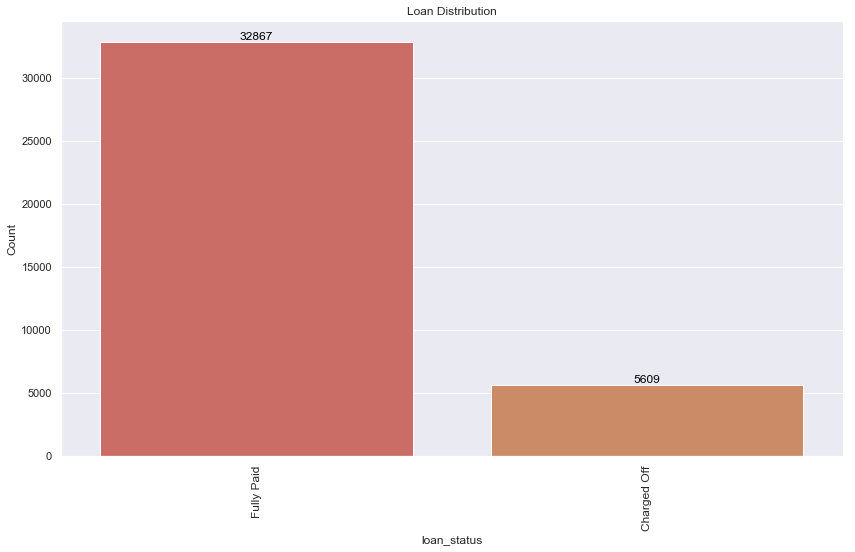

In [151]:
draw_univariate_plot(column_name='loan_status',title='Loan Distribution',df=loan_not_current_df,type_of_variable="Categorical")

###### 3.2.1.2 Home Ownership
Conclusion
- RENT -> 15% of the people Defaults
- MORTGAGE -> 13.5 % of the people Defaults
- OWN -> 14.8% of the people Defaults
- Cleaned records with value NONE ,OTHER

- People on RENT & MORTGAGE Defaults more

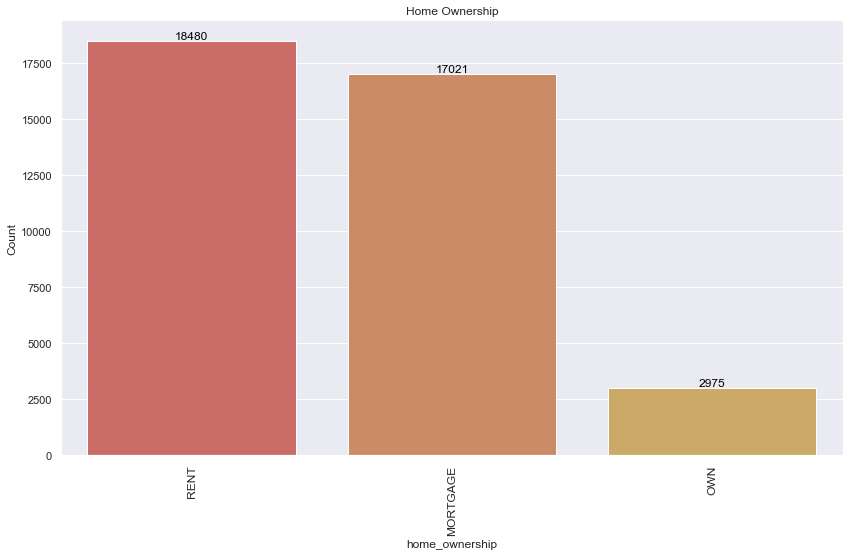

In [152]:
draw_univariate_plot(column_name='home_ownership',title='Home Ownership',df=loan_not_current_df,type_of_variable="Categorical")

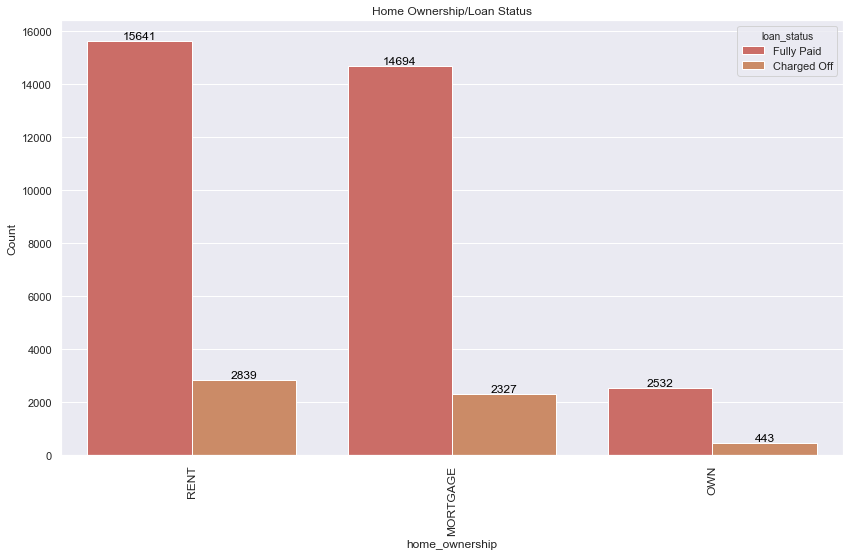

In [153]:
draw_univariate_plot(column_name='home_ownership',title='Home Ownership/Loan Status',df=loan_not_current_df,type_of_variable="Categorical",hue="loan_status")

###### 3.2.1.3 Verification status
Conclusion
- Verified -> 16% of the people Defaults
- Not Verified -> 13 % of the people Defaults
- rename the Source Verified to Verified

- Interestingly, we see that as income verification increases, the loan performance actually worsens 

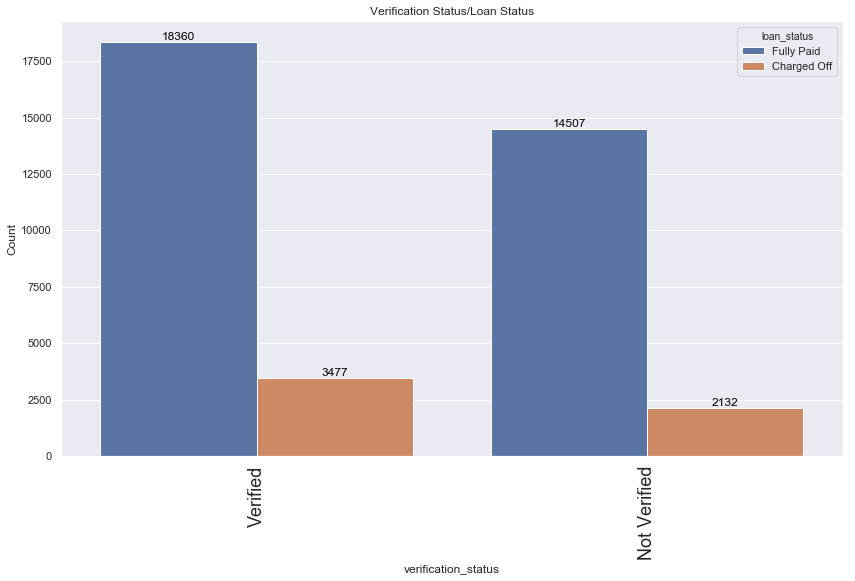

In [106]:
draw_univariate_plot(column_name='verification_status',title='Verification Status/Loan Status',df=loan_not_current_df,type_of_variable="Categorical",hue="loan_status")

###### 3.2.1.3 Purpose
Conclusion
- Debt Consolidation & Credit Card - Most people takes loan to pay debt followed by credit card
- Small business loans perform very poorly, reflecting the fact that those borrowers unable to get bank financing for their small business may have poor credit or business plans that aren't fully developed.

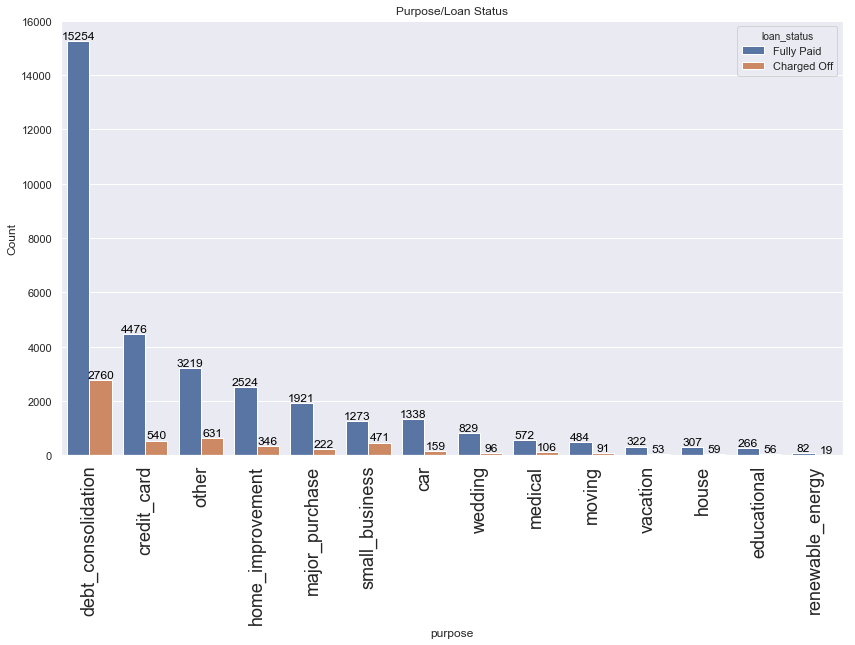

In [105]:

draw_univariate_plot(column_name='purpose',title='Purpose/Loan Status',df=loan_not_current_df,type_of_variable="Categorical",hue="loan_status")

###### 3.2.1.4 Issue Year
Conclusion
- Loan is increasing since 2007 and not decreaseing


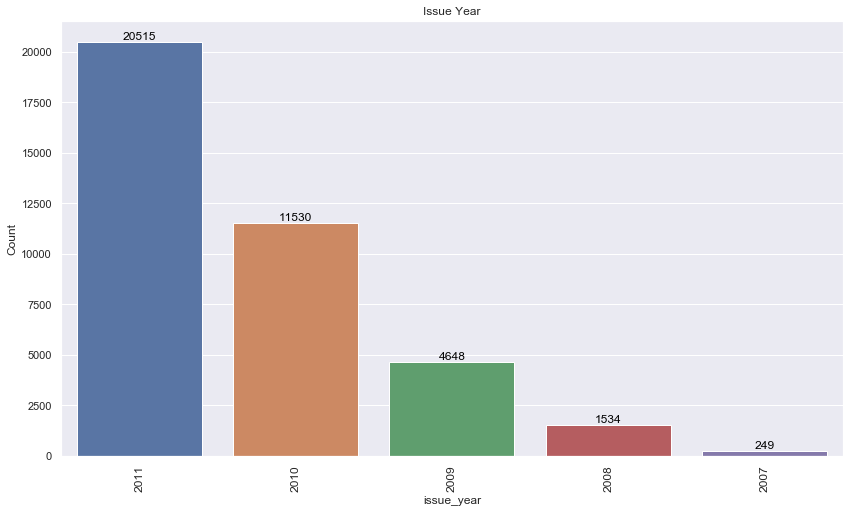

In [114]:
draw_univariate_plot(column_name='issue_year',title='Issue Year',df=loan_not_current_df,type_of_variable="Categorical")

###### 3.2.1.5 Employee Length
Conclusion
- Most loan exists between people with experience 2-9 years

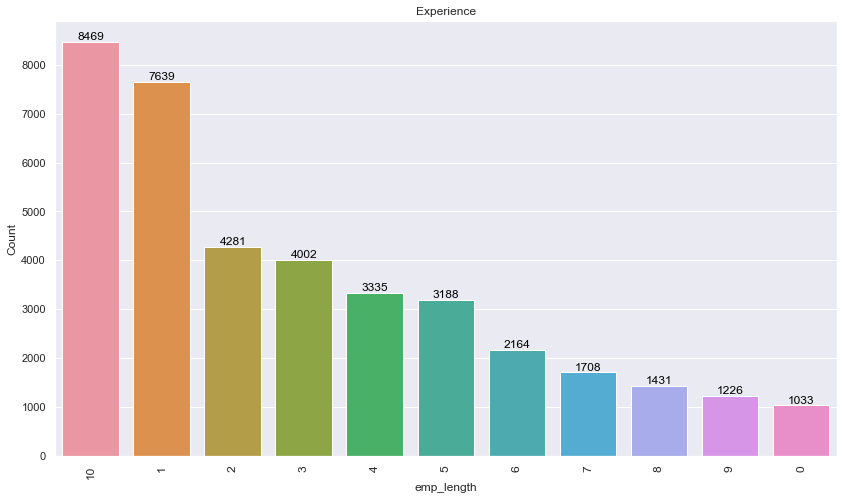

In [115]:
draw_univariate_plot(column_name='emp_length',title='Experience',df=loan_not_current_df,type_of_variable="Categorical")

###### 3.2.1.5 Grade
Conclusion
- Sovan need to put the details

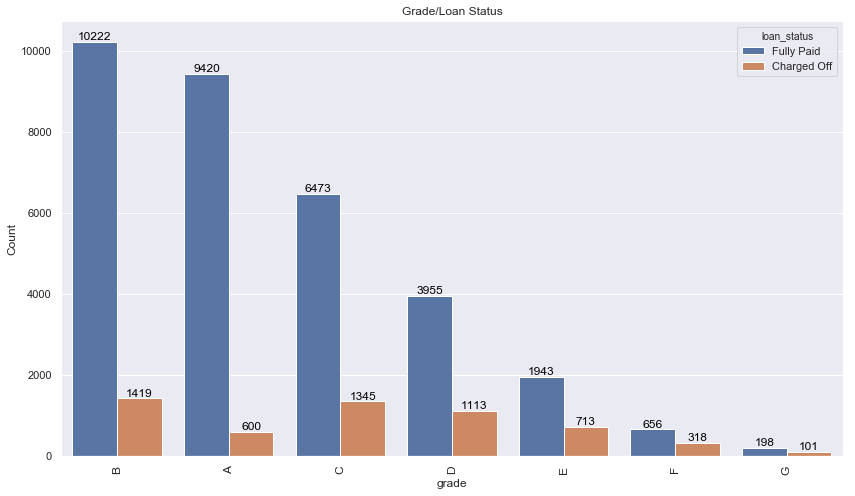

In [119]:
draw_univariate_plot(column_name='grade',title='Grade/Loan Status',df=loan_not_current_df,type_of_variable="Categorical",hue="loan_status")

###### 3.2.1.5 Term
Conclusion
- Majority of the loan applied for 36 months term approx 75%

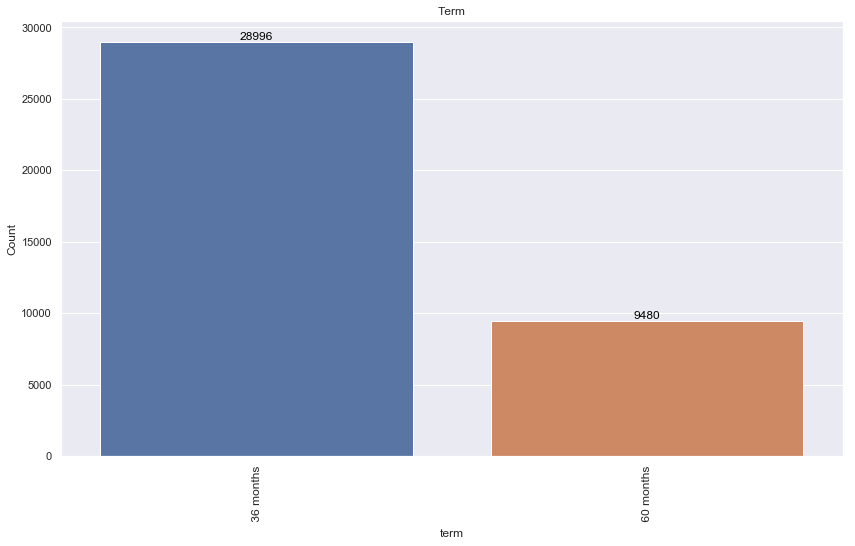

In [128]:
draw_univariate_plot(column_name='term',title='Term',df=loan_not_current_df,type_of_variable="Categorical")

###### 3.2.2 Continous Variables - Univariate Analysis
- Interest Rate
- Annual Income
- Loan Amount
- Funded Amount

###### 3.2.2.1 Interest Rate
Conclusion
- Interest rate is between 9-14%
- outlier exists

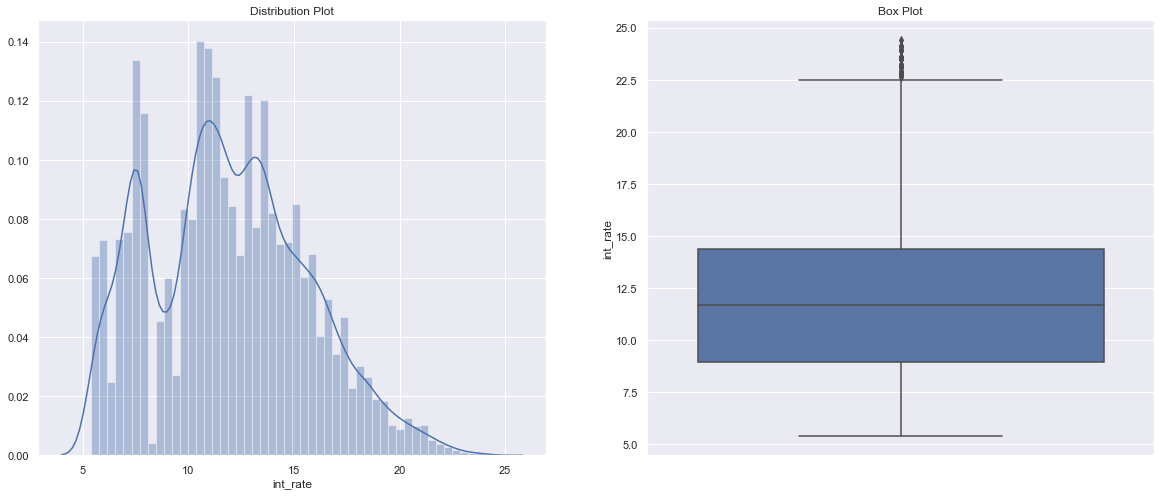

In [129]:
draw_univariate_plot(column_name='int_rate',df=loan_not_current_df,type_of_variable="Continous")

###### 3.2.2.1 Annual Income
Conclusion
- Outlier exists , can we remove them?
- Tanisha to remove the outlier

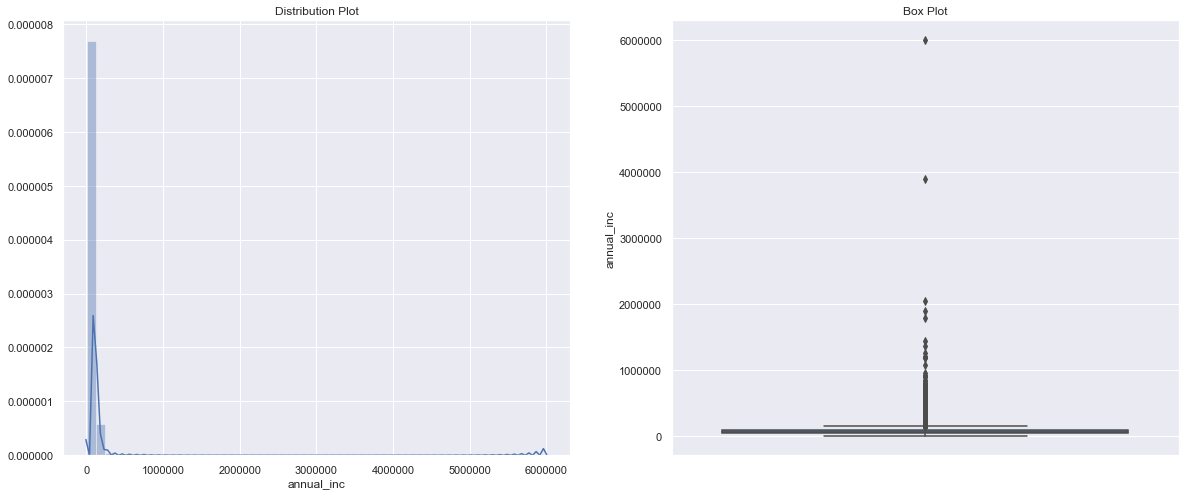

In [130]:
draw_univariate_plot(column_name='annual_inc',df=loan_not_current_df,type_of_variable="Continous")

###### 3.2.2.1 Loan Amount
Conclusion
- Most loan exists between 5000 & 15000

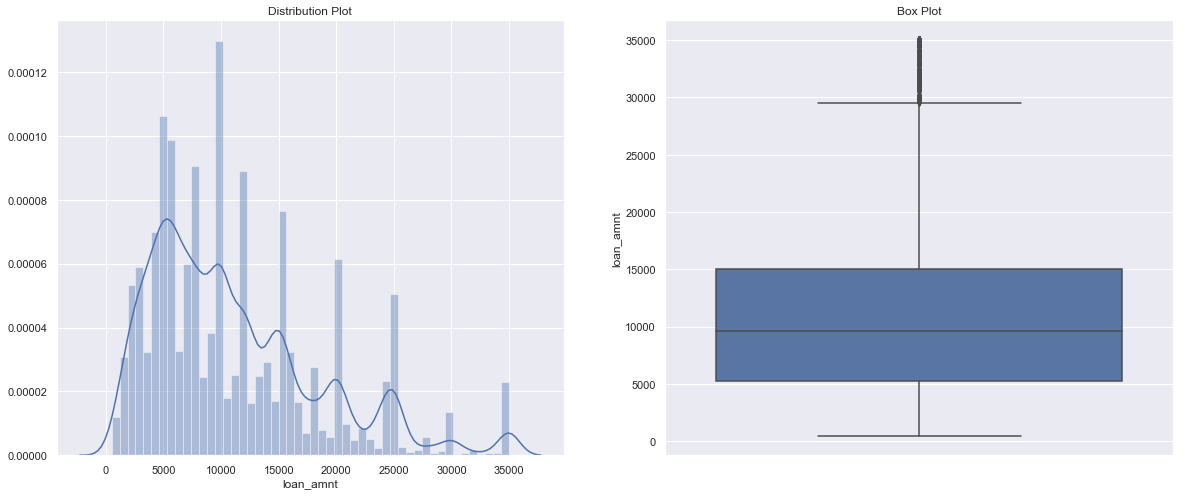

In [131]:
draw_univariate_plot(column_name='loan_amnt',df=loan_not_current_df,type_of_variable="Continous")

###### 3.2.2.1 Funded Amount
Conclusion
- Most loan exists between 5000 & 15000
- outlier exists

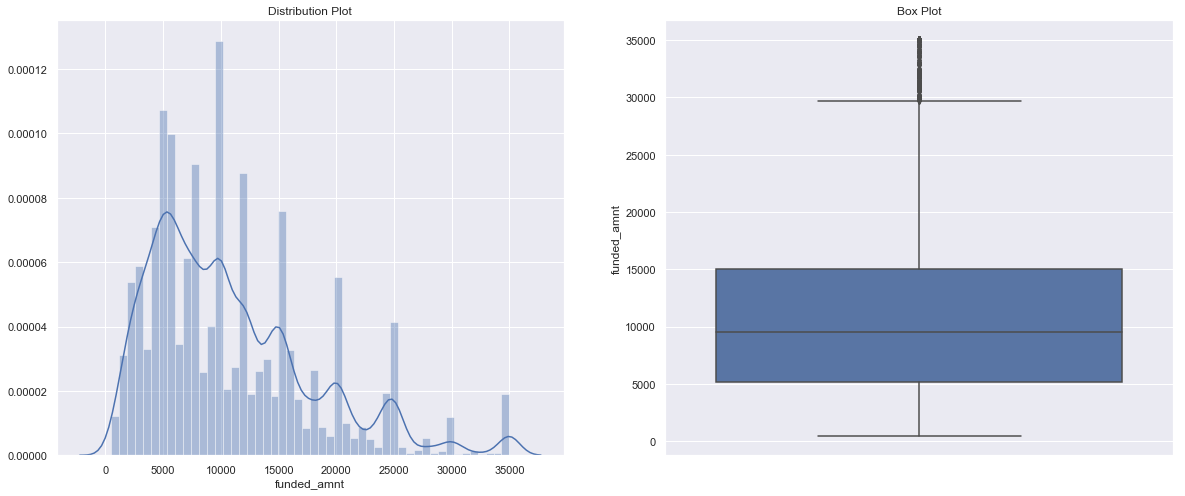

In [132]:
draw_univariate_plot(column_name='funded_amnt',df=loan_not_current_df,type_of_variable="Continous")

###### 3.3.1 BiVariate Analysis
- Heat Map for continous variables
- inq_last_6mths Inquiries in the past 6 months 
- 

In [134]:
def draw_bivariate_plot(column_name,df,hue=None,title=None):
 sns.set(style="darkgrid")
 plt.figure(figsize=(20,8))
 ax =sns.countplot(x=column_name,hue=hue,data=df)
 ax.set(xlabel=column_name, ylabel='Count')
 plt.title(title)
 plt.tight_layout()


 for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
            fontsize=12, color='black', ha='center', va='bottom')
 plt.show()  

###### 3.2.2.1 Heat Map 
Conclusion
- Obviously the correlation exists in the funded_amnt,funded_amnt_inv ,loan_amnt,installement

In [140]:
#create a correlation 
corr_loan=loan_not_current_df[['loan_amnt','funded_amnt','annual_inc','int_rate','dti','installment']].corr() 
corr_loan

,loan_amnt,funded_amnt,annual_inc,int_rate,dti,installment
loan_amnt,1.000000,0.981877,0.268944,0.301100,0.062389,0.932318
funded_amnt,0.981877,1.000000,0.264716,0.304841,0.062170,0.958014
annual_inc,0.268944,0.264716,1.000000,0.048880,-0.121358,0.267691
int_rate,0.301100,0.304841,0.048880,1.000000,0.110876,0.276984
dti,0.062389,0.062170,-0.121358,0.110876,1.000000,0.052135
installment,0.932318,0.958014,0.267691,0.276984,0.052135,1.000000


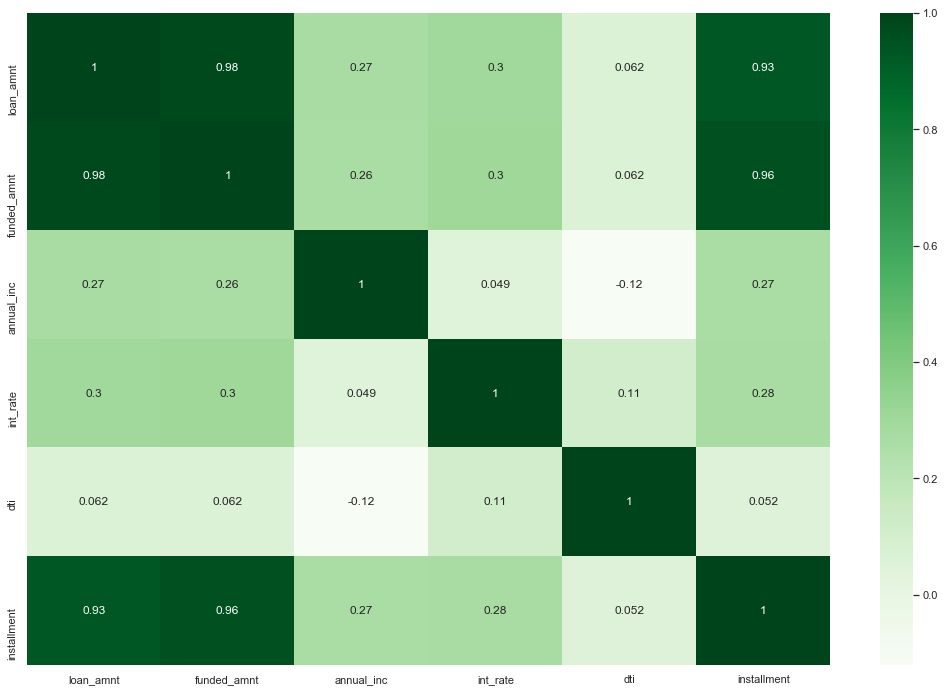

In [141]:
#Heat map to show the correlation 
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr_loan, 
            xticklabels=corr_loan.columns.values,
            yticklabels=corr_loan.columns.values,annot= True,cmap="Greens")
plt.show()

##### Inquiries in the past 6 months 
Number of inquiries refers to the number of times a borrower's credit report is accessed by financial institutions, which generally happens when the borrower is seeking a loan or credit line. More inquiries leads to higher rates of Defaulters, indicating that increased borrower desperation to access credit might highlight poor financial health. Interestingly, we see an increase in loan performance in the 4+ inquiries bucket. These high levels of inquiries may reflect financially bad borrowers looking around for mortgage loans or credit cards.

In [142]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['inq_last_6mths_range'], loan_not_current_df['loan_status'], margins=True).style.background_gradient(cmap = cm)

loan_status,Charged Off,Fully Paid,All
inq_last_6mths_range,,,
0-1,3947,25353,29300
1-2,939,4696,5635
2-3,615,2355,2970
3-4,51,265,316
4 and above,57,198,255
All,5609,32867,38476


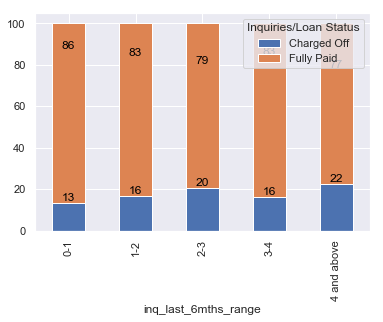

In [143]:
#percentage  of defaulters inquiries even if it is charged off
cm = sns.light_palette("orange", as_cmap=True)
df=pd.crosstab(loan_not_current_df['inq_last_6mths_range'], loan_not_current_df['loan_status']).apply(lambda r: (r/r.sum())*100, axis=1)
ax=df.plot.bar(stacked=True)
plt.legend(title='Inquiries/Loan Status')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.show()

##### Revolving utilization percent
Revolving utilization percent is the portion of a borrower's revolving credit limit (i.e. credit card limit) that they actually are using at any given point. We can see below that the percentage of Charged off loans steadily increases with utilization rate. Borrowers with high utilization rates are more likely to have high fixed credit card payments which might affect their ability to repay their loans. Also, a high utilization rate often reflects a lack of other financing options, with borrowers turning to peer-to-peer lending as a last resort. This is in contrast to those borrowers with low utilization rates, who may be using peer-to-peer lending opportunistically to pursue lower interest payments.

In [144]:
#percentage  of defaulters Revolving utilization percent
cm = sns.light_palette("orange", as_cmap=True)
df=pd.crosstab(loan_not_current_df['revol_util_range'], loan_not_current_df['loan_status'], margins=True)

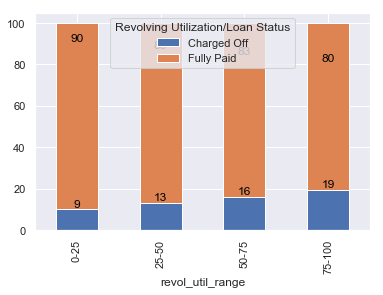

In [145]:
cm = sns.light_palette("orange", as_cmap=True)
df=pd.crosstab(loan_not_current_df['revol_util_range'], loan_not_current_df['loan_status']).apply(lambda r: (r/r.sum())*100, axis=1)
ax=df.plot.bar(stacked=True)
plt.legend(title='Revolving Utilization/Loan Status')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.show()

##### Debt to income ratio
Debt to income ratio indicates the ratio between a borrowers monthly debt payment and monthly income. As we might expect, there is a steady increase in the percentage of non-performing loans as DTI increases, reflecting the constraints that increased debt put onto borrower ability to repay:

In [148]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['dti_range'], loan_not_current_df['loan_status'], margins=True).style.background_gradient(cmap = cm)

loan_status,Charged Off,Fully Paid,All
dti_range,,,
0-5,596,4273,4869
5-10,1001,6843,7844
10-15,1394,8206,9600
15-20,1386,7409,8795
20-25,1116,5452,6568
25-30,87,536,623
30 and above,0,0,0
All,5580,32719,38299


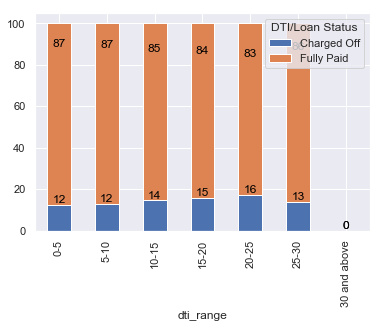

In [149]:
cm = sns.light_palette("orange", as_cmap=True)
df=pd.crosstab(loan_not_current_df['dti_range'], loan_not_current_df['loan_status']).apply(lambda r: (r/r.sum())*100, axis=1)
ax=df.plot.bar(stacked=True)
plt.legend(title='DTI/Loan Status')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.show()

##### Address State vs Loan Status

In [ ]:
#clearly the NE state has more number of the defaulters,but the total loans is also less
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['addr_state'], loan_not_current_df['loan_status'], margins=True).style.background_gradient(cmap = cm)

######  Loan Amount vs Term

In [ ]:
draw_bivariate_plot(column_name="loan_amnt_bin",hue="term",df=loan_not_current_df)

In [ ]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['loan_amnt_bin'], loan_not_current_df['term'], margins=True).style.background_gradient(cmap = cm)

######  Interest Rate by Grade
Conclusion 
- Grade A - 5.5-9.0 
- Grade B - 9.0 - 12.0
- Grade C - 12.0 - 15
- Grade D/E/F - 15 and above

Interest Rate increases with the Grade A-G 

In [ ]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['int_rate_range'], loan_not_current_df['grade'], margins=True).style.background_gradient(cmap = cm)

##### Interest Rate vs Loan Status
- As the interest rate increases ,number of defaulters also increases

In [ ]:
cm = sns.light_palette("orange", as_cmap=True)
df=pd.crosstab(loan_not_current_df['int_rate_range'], loan_not_current_df['loan_status']).apply(lambda r: (r/r.sum())*100, axis=1)
ax=df.plot.bar(stacked=True)
plt.legend(title='Interest Rate Range/Loan Status')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [ ]:
draw_bivariate_plot(column_name="grade",hue="int_rate_range",df=loan_not_current_df)

In [ ]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['int_rate_range'], loan_not_current_df['grade'], margins=True).style.background_gradient(cmap = cm)

##### delinq_2yrs
The number of delinquencies in the past 2 years indicates the number of times a borrower has been behind on payments. 
- no attern found

In [ ]:
draw_bivariate_plot(column_name="delinq_2yrs_range",hue="loan_status",df=loan_not_current_df)

In [ ]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['delinq_2yrs_range'], loan_not_current_df['loan_status'], margins=True).style.background_gradient(cmap = cm)

In [ ]:
cm = sns.light_palette("orange", as_cmap=True)
df=pd.crosstab(loan_not_current_df['delinq_2yrs_range'], loan_not_current_df['loan_status']).apply(lambda r: (r/r.sum())*100, axis=1)
ax=df.plot.bar(stacked=True)
plt.legend(title='delinq_2yrs/Loan Status')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.show()

######  Loan Amount vs Anual Income
- Total number of loan increases with the income rise
- Most of the loans are taken by people whose income is above 30000 and Loan amount in range 5000-10000

In [ ]:
draw_bivariate_plot(column_name="annual_inc_bin",hue="loan_amnt_bin",df=loan_not_current_df)

In [ ]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['annual_inc_bin'], loan_not_current_df['loan_amnt_bin'], margins=True).style.background_gradient(cmap = cm)

######  Loan Amount vs Annual Income(Defaulters)
- Total number of loan increases with the income rise
- Most of the loans are taken by people whose income is above 30000 and Loan amount in range 5000-10000

In [ ]:
draw_bivariate_plot(column_name="monthly_inc_range",hue="installment_range",df=loan_defaulters)

In [ ]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['monthly_inc_range'], loan_not_current_df['installment_range'], margins=True).style.background_gradient(cmap = cm)